# Imports y primera media




In [1]:
import mne
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel as nib
from matplotlib.pyplot import figure
from matplotlib import patches

import nilearn
from nilearn.datasets import fetch_spm_auditory
from nilearn import image
from nilearn import masking
import pandas as pd

from os.path import join as opj
from nibabel.testing import data_path
import json
from nipype.interfaces.spm import Level1Design, EstimateModel, EstimateContrast, Normalize12
#tpm_img ='/home/ubuntu/Documents/MATLAB/spm12/tpm/TPM.nii' # normalization template

from nipype.algorithms.modelgen import SpecifySPMModel
from nipype.interfaces.utility import Function, IdentityInterface
from nipype.interfaces.io import SelectFiles, DataSink
from nipype import Workflow, Node
#from bids.layout import BIDSLayout
from nipype.algorithms.misc import Gunzip

import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
import nibabel as nib



In [11]:
#fMRI


subject_data = 'C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen/sub-xp101/func/sub-xp101_task-eegfmriNF_bold.nii.gz'
fmri_img= nib.load(subject_data)


mean_img = image.mean_img(fmri_img)

mean_img
print(mean_img.shape) # passo a 3D

mask = masking.compute_epi_mask(mean_img) #mascara

# Clean and smooth data
#fmri_img = image.clean_img(fmri_img, standardize=False)
#fmri_img = image.smooth_img(fmri_img, 5.)


(106, 106, 32)


In [17]:
from dipy.io.image import load_nifti

fmri_img, affine, img = load_nifti(subject_data , return_img=True)

# Probando con separación Task - Rest 

In [43]:

# fmri_numpy = np.array(fmri_img.dataobj)


fmri_rest=[]
fmri_rest_todos=[]

for rest in range(1,201,20):
    
    fmri_rest=fmri_img[:,:,:,rest:rest+10]
    
    if rest==1:
        fmri_rest_todos=fmri_rest
      

    else:
        fmri_rest_todos= np.concatenate((fmri_rest_todos,fmri_rest), axis=3)
  

print (fmri_rest_todos.shape)


fmri_task=[]
fmri_task_todos=[]

for task in range(11,211,20):
    
    fmri_task=fmri_img[:,:,:,task:task+10]
    
    if task==11:
        fmri_task_todos=fmri_task
    

    else:
        fmri_task_todos= np.concatenate((fmri_task_todos,fmri_task), axis=3)
  

print (fmri_task_todos.shape)



(106, 106, 32, 100)
(106, 106, 32, 100)


In [32]:
import nibabel as nib
from nibabel import Nifti1Image
fmri_rest_todos=nib.Nifti1Image(fmri_rest_todos,affine)  
fmri_task_todos=nib.Nifti1Image(fmri_task_todos,affine)  

mean_img_rest = image.mean_img(fmri_rest_todos)

mean_img_task = image.mean_img(fmri_task_todos)

print (mean_img_rest.shape)
print (mean_img_task.shape)

(106, 106, 32)
(106, 106, 32)


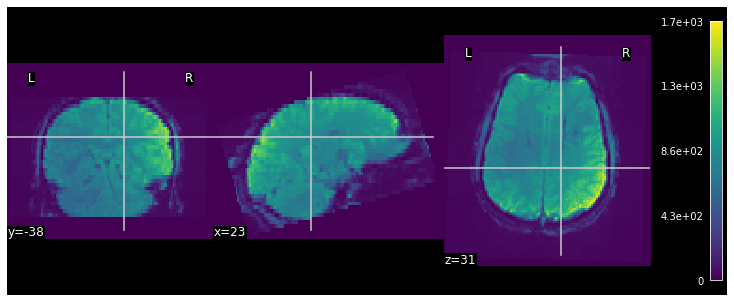

In [37]:
from nilearn import plotting
from matplotlib import pyplot as plt

mask_3D_rest = masking.compute_epi_mask(mean_img_rest)

fig=plt.figure(figsize=(10,4))
plotting.plot_img(mean_img_rest, figure=fig, black_bg=True, colorbar=True, resampling_interpolation='continuous', bg_img=None, vmin=None, vmax=None)



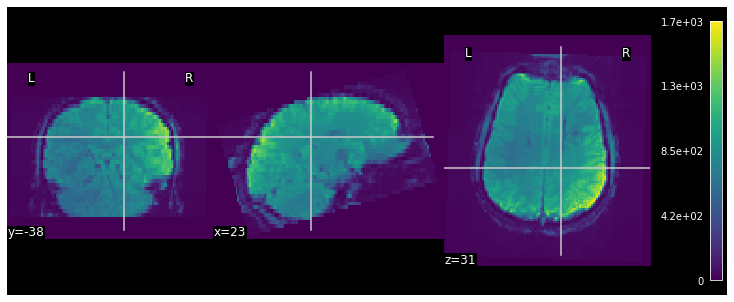

In [38]:
fig=plt.figure(figsize=(10,4))
plotting.plot_img(mean_img_task, figure=fig, black_bg=True, colorbar=True, resampling_interpolation='continuous', bg_img=None, vmin=0, vmax=1700)

# Bien

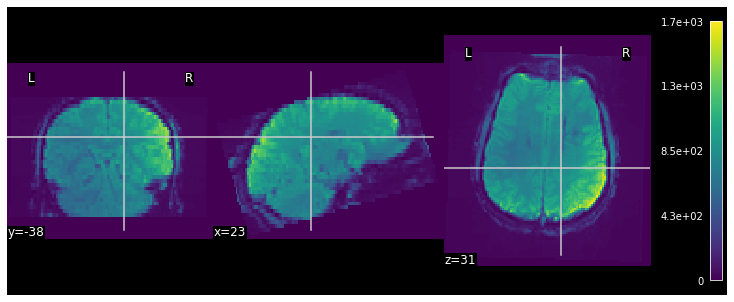

In [35]:
from nilearn import plotting
from matplotlib import pyplot as plt

fig=plt.figure(figsize=(10,4))
plotting.plot_img(mean_img, figure=fig, black_bg=True, colorbar=True, resampling_interpolation='continuous', bg_img=None, vmin=None, vmax=None)

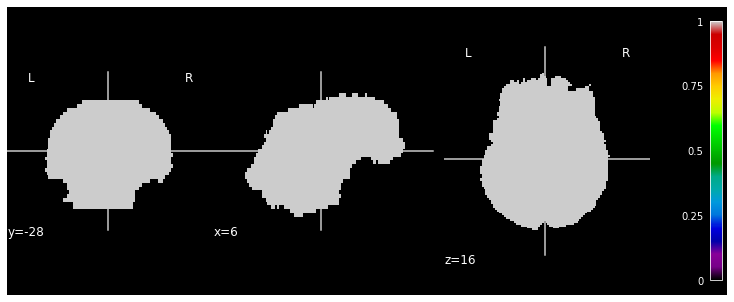

In [34]:
mask_3D = masking.compute_epi_mask(mean_img)

fig2=plt.figure(figsize=(10,4))
plotting.plot_epi(mask_3D, figure=fig2, black_bg=True, colorbar=True, resampling_interpolation='continuous', bg_img=None, vmin=None, vmax=None)

events_ = pd.read_table('/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project/task-eegfmriNF_events.tsv')



del events_['stim_file']

events=events_.replace({'Task-NF':'Task'})

events


In [11]:
import numpy as np
tr = 2  # repetition time of MRI scans is 7 seconds
n_scans = fmri_img.shape[3]  # the acquisition comprises 96 scans
frame_times = np.arange(n_scans) * tr  # here are the correspoding frame times
frame_times

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206,
       208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232,
       234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258,
       260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284,
       286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310,
       312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336,
       338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 36

<AxesSubplot:label='conditions', ylabel='scan number'>

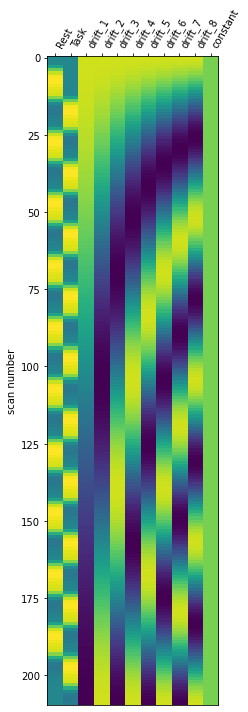

In [12]:
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.plotting import plot_design_matrix

hrf_model = 'spm'
X1 = make_first_level_design_matrix(frame_times, events, drift_model='Cosine',
                                    hrf_model=hrf_model)

plot_design_matrix(X1)

In [13]:
from nilearn.glm.first_level import FirstLevelModel

fmri_glm = FirstLevelModel(signal_scaling=False, mask_img=mask, minimize_memory=False)
fmri_glm = fmri_glm.fit(fmri_img, design_matrices=X1)

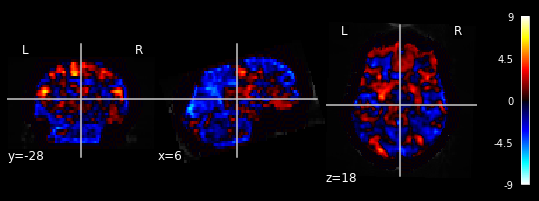

In [14]:
from nilearn import plotting

z_map = fmri_glm.compute_contrast('Task- Rest')

plotting.plot_stat_map(z_map, bg_img=mean_img)

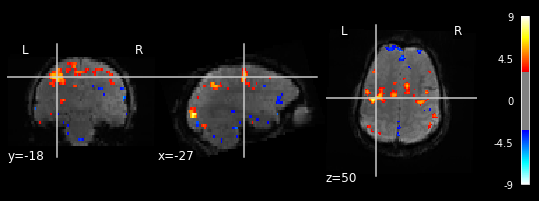

In [15]:
plotting.plot_stat_map(z_map, bg_img=mean_img, threshold=3.1)

In [16]:
from nilearn.reporting import get_clusters_table
from nilearn import maskers
from nilearn import input_data

table = get_clusters_table(z_map, stat_threshold=3.1,
                           cluster_threshold=20).set_index('Cluster ID', drop=True)
print(table.head())

# get the 4 largest clusters' max x, y, and z coordinates
coords = table.loc[range(1,5), ['X', 'Y', 'Z']].values
print(coords)

# extract time series from each coordinate
masker = input_data.NiftiSpheresMasker(coords)
real_timeseries = masker.fit_transform(fmri_img)
# The predicted time series was also extracted with GLM, it is useful to assess the quality of the model fit.
predicted_timeseries = masker.fit_transform(fmri_glm.predicted[0])

print(real_timeseries.shape)
print(predicted_timeseries.shape)

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


                    X          Y          Z  Peak Stat Cluster Size (mm3)
Cluster ID                                                               
1          -32.520330 -20.197223  47.529446   7.566175                455
1a         -18.657965 -20.550283  47.357632   5.425380                   
2          -25.054582 -93.460478   0.899240   6.660407                941
2a         -22.741327 -87.401808  15.181689   5.547003                   
2b         -21.092885 -98.850905  11.802114   3.508174                   
[[-32.52032956 -20.1972231   47.5294461 ]
 [-25.05458245 -93.46047845   0.89924023]
 [-31.66406559 -62.40282136  43.43638642]
 [ 59.96584937 -44.59523644  44.06199447]]
(210, 4)
(210, 4)


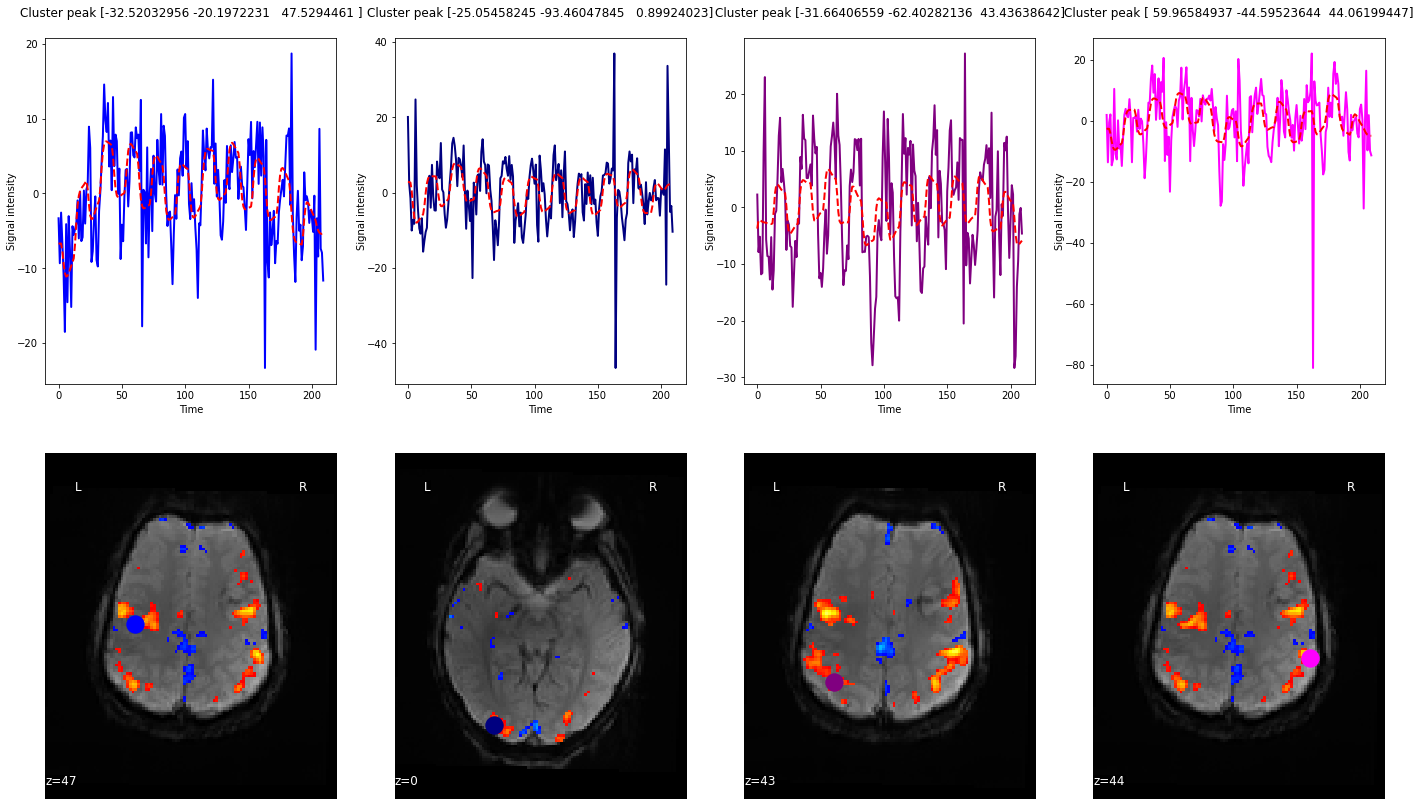

In [17]:
from matplotlib import pyplot as plt
# colors for each of the clusters
colors = ['blue', 'navy', 'purple', 'magenta']
# plot the time series and corresponding locations
fig1, axs1 = plt.subplots(2, 4)
for i in range(0, 4):
    # plotting time series
    axs1[0, i].set_title('Cluster peak {}\n'.format(coords[i]))
    axs1[0, i].plot(real_timeseries[:, i], c=colors[i], lw=2)
    axs1[0, i].plot(predicted_timeseries[:, i], c='r', ls='--', lw=2)
    axs1[0, i].set_xlabel('Time')
    axs1[0, i].set_ylabel('Signal intensity', labelpad=0)
    # plotting image below the time series
    roi_img = plotting.plot_stat_map(
        z_map, cut_coords=[coords[i][2]], threshold=3.1, figure=fig1,
        axes=axs1[1, i], display_mode='z', colorbar=False, bg_img=mean_img)
    roi_img.add_markers([coords[i]], colors[i], 300)
fig1.set_size_inches(24, 14)

In [18]:
# get the 4 largest clusters' max x, y, and z coordinates
coords = table.loc[range(1, 15), ['X', 'Y', 'Z']].values

# extract time series from each coordinate
masker = input_data.NiftiSpheresMasker(coords)
real_timeseries = masker.fit_transform(fmri_img)

(14, 14)


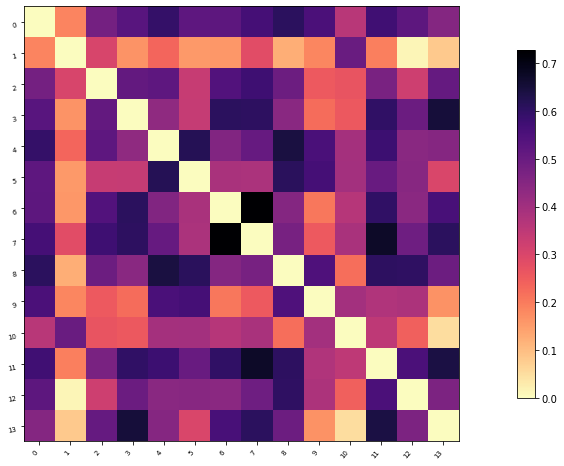

In [19]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([real_timeseries])[0]
print(correlation_matrix.shape)
# Plot the correlation matrix
import numpy as np
from nilearn import plotting
# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=np.arange(14), reorder=False, cmap='magma_r')

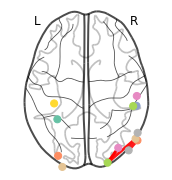

In [20]:
# We will roughly adjust the coordinates to plot them into the glass brain
coords_plot = coords.copy()
coords_plot[:,1] = coords[:,1] - 30 


plotting.plot_connectome(correlation_matrix,
                         coords_plot, edge_threshold='95%',
                         display_mode="z")